In [11]:
from keras.layers import Input, Dense
from keras.models import Sequential, Model

In [3]:
encoding_dim = 32 # Number of units in the hidden layer i.e number of latent features that 
                  # will be learnt

In [30]:
input_img = Input(shape=(784, ))

In [31]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [32]:
decoded = Dense(784, activation='sigmoid')(encoded)

In [33]:
autoencoder = Model(input_img, decoded)

In [34]:
encoder = Model(input_img, encoded)

In [42]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [35]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [36]:
from keras.datasets import mnist
import numpy as np

In [37]:
(x_train, _), (x_test, _) = mnist.load_data()

In [38]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [39]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.1918 - val_loss: 0.1430
Epoch 2/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1290 - val_loss: 0.1156
Epoch 3/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.1101 - val_loss: 0.1035
Epoch 4/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.1026 - val_loss: 0.0989
Epoch 5/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0994 - val_loss: 0.0970
Epoch 6/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0980 - val_loss: 0.0960
Epoch 7/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0973 - val_loss: 0.0955
Epoch 8/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0968 - val_loss: 0.0950
Epoch 9/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0962 - val_

In [43]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

### Plot the encoded and decoded images

In [45]:
%matplotlib inline

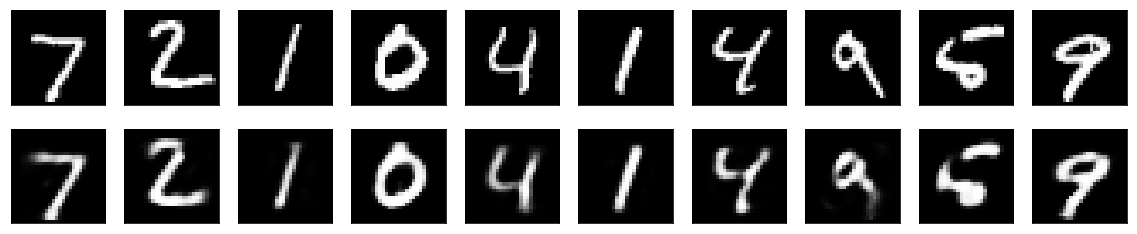

In [46]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Data lost is high in the previous model.
- We can limit this using sparsity autoencoders
- Basically fewer units in the hidden layer will 'fire' at the same time allowing the model to learn a more sparse representation
- Can be done using regularizers models and `activity_regularizer` parameter in the model.

In [47]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [49]:
from keras.callbacks import TensorBoard

In [52]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/logs')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 309us/step - loss: 0.1950 - val_loss: 0.1936
Epoch 2/50
60000/60000 [==============================] - 17s 278us/step - loss: 0.1945 - val_loss: 0.1932
Epoch 3/50
60000/60000 [==============================] - 20s 325us/step - loss: 0.1941 - val_loss: 0.1929
Epoch 4/50
60000/60000 [==============================] - 22s 360us/step - loss: 0.1937 - val_loss: 0.1924
Epoch 5/50
60000/60000 [==============================] - 25s 422us/step - loss: 0.1933 - val_loss: 0.1920
Epoch 6/50
60000/60000 [==============================] - 27s 445us/step - loss: 0.1929 - val_loss: 0.1917
Epoch 7/50
60000/60000 [==============================] - 19s 323us/step - loss: 0.1926 - val_loss: 0.1913
Epoch 8/50
60000/60000 [==============================] - 22s 374us/step - loss: 0.1923 - val_loss: 0.1910
Epoch 9/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.1920 - val_

KeyboardInterrupt: 